<a href="https://colab.research.google.com/github/Emilyjane994/Phenotype-paper/blob/main/one_versus_rest_from_all_KMeans_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd        
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns 

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving KMeans_allpop.xlsx.csv to KMeans_allpop.xlsx.csv


In [ ]:
#read the data with pandas
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['KMeans_allpop.xlsx.csv']))
print(df)


      ID# Pathology  clusterNo  Age Sex   cN1A status  TCRgd    Vd2  Vd2+Vg9+  \
0    IBM1       IBM          2   77   F  SERONEGATIVE   2.01   0.10    100.00   
1    IBM2       IBM          0   72   M  SEROPOSITIVE   1.55  56.00     36.10   
2    IBM3       IBM          0   98   M  SERONEGATIVE   4.36   5.47     97.70   
3    IBM4       IBM          2   62   M  SEROPOSITIVE   0.52  60.24     27.00   
4    IBM5       IBM          0   76   M  SERONEGATIVE   3.03   1.61    100.00   
..    ...       ...        ...  ...  ..           ...    ...    ...       ...   
76  IBM77       IBM          0   72   F  SEROPOSITIVE   3.34   6.55     72.10   
77  IBM78       IBM          1   58   F  SERONEGATIVE   2.17  53.80     82.00   
78  IBM79       IBM          1   61   M  SERONEGATIVE   2.13  44.63     33.95   
79  IBM80       IBM          0   73   M  SERONEGATIVE  15.80   1.45    100.00   
80  IBM81       IBM          2   63   F  SERONEGATIVE   2.76  84.46      8.17   

    Vd2CD27-  ...  monocyte

In [ ]:
df.head(10)

,ID#,Pathology,clusterNo,Age,Sex,cN1A status,TCRgd,Vd2,Vd2+Vg9+,Vd2CD27-,...,monocytes,Nkcells,Basophils,cDC,CD56-16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes
0,IBM1,IBM,2,77,F,SERONEGATIVE,2.01,0.10,100.0,100.00,...,1.2437,1.7545,0.1978,0.0215,40.6818,6.8182,51.3182,62.8407,32.5104,4.3604
1,IBM2,IBM,0,72,M,SEROPOSITIVE,1.55,56.00,36.1,51.30,...,2.8868,4.1113,0.4441,0.1068,5.2128,5.7548,88.4338,77.3706,13.2434,2.1211
2,IBM3,IBM,0,98,M,SERONEGATIVE,4.36,5.47,97.7,7.95,...,2.5411,4.5015,0.1263,0.0755,50.9316,0.9435,48.8349,76.6577,11.8605,5.1916
3,IBM4,IBM,2,62,M,SEROPOSITIVE,0.52,60.24,27.0,26.00,...,1.6238,0.8723,0.1069,0.1582,5.2013,3.7763,90.0606,87.1038,3.1962,0.3636
4,IBM5,IBM,0,76,M,SERONEGATIVE,3.03,1.61,100.0,30.30,...,3.1385,5.9818,0.1829,0.0651,6.2654,1.8280,91.7649,76.0554,23.3342,25.4420
5,IBM6,IBM,1,77,F,SEROPOSITIVE,3.65,9.57,100.0,1.24,...,1.2915,2.4479,0.6381,0.1543,8.0593,4.0950,86.8724,47.7693,13.3633,7.6715
6,IBM7,IBM,1,65,M,SERONEGATIVE,7.84,5.78,0.0,17.50,...,1.2895,1.8476,0.2164,0.0642,2.5894,2.9100,94.2787,90.8108,12.1908,0.8834
7,IBM8,IBM,0,74,M,SEROPOSITIVE,1.74,2.00,88.9,27.80,...,2.3282,2.2877,0.0868,0.0454,72.3856,0.3225,25.8157,78.2395,19.3198,3.7299
8,IBM9,IBM,0,87,M,SERONEGATIVE,1.02,18.30,49.1,3.70,...,3.0454,1.2668,0.2271,0.2781,4.8059,2.1719,92.5832,82.3822,7.4676,2.6333
9,IBM10,IBM,1,54,F,SERONEGATIVE,3.15,73.10,85.9,21.80,...,1.4820,2.0291,0.0748,0.0405,9.5098,16.9853,72.7574,88.2324,16.9966,7.2651


In [ ]:
# list the column names
df.columns

Index(['ID#', 'Pathology', 'clusterNo', 'Age', 'Sex', 'cN1A status', 'TCRgd',
       'Vd2', 'Vd2+Vg9+', 'Vd2CD27-', 'Vd2+Cx3Cr1+', 'Vd2CD57+', 'Vd1',
       'Vd1+Vg9+', 'Vd1CD27-', 'Vd1Cx3Cr1', 'Vd1CD57', 'VD1-VD2-', 'CD4CD57',
       'CD4KLRG1', 'CD8CD57', 'CD8KLRG1', 'CD4', 'CD4Naive', 'CD4CM', 'CD4EM',
       'CD4Temra', 'CD4+CD27-', 'CD4+CD28-', 'CD4+KI67', 'CD4+Tbet',
       'CD4+IFNg', 'CD4+Perf', 'CD4+IL17A', 'CD4+IFNg+Perf+', 'CD8',
       'CD8Naive', 'CD8CM', 'CD8EM', 'CD8Temra', 'CD8+CD27-', 'CD8+CD28-',
       'CD8+KI67', 'CD8+Tbet', 'CD8+IFNg', 'CD8+Perf', 'CD8+IL17A',
       'CD8+IFNg+Perf+', 'Bcells', 'DN_Bcells', 'NaiveBcells', 'NonSM', 'SM',
       'Treg', 'TregFoxP3', 'TregKI67', 'NaiveTreg', 'MemTreg', 'ActTreg',
       'Neutrophils', 'NKT', 'pDC', 'monocytes', 'Nkcells', 'Basophils', 'cDC',
       'CD56-16b', 'CD56b', 'CD56dim', 'classical_monocytes', 'int_monocytes',
       'inflam_monocytes'],
      dtype='object')

In [ ]:
df['clusterNo'].unique()

array([2, 0, 1])

<Axes: >

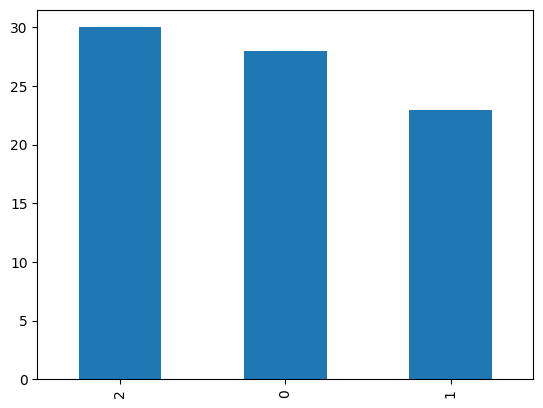

In [ ]:
# plot a bar chat to display the class distribution
df['clusterNo'].value_counts().plot.bar()

In [ ]:
subset=df.iloc[:,1:]

In [ ]:
# drop columns 2 and 3
subset= subset.drop(columns=['Pathology','Sex', 'cN1A status'])

In [ ]:
subset.head(10)

,clusterNo,Age,TCRgd,Vd2,Vd2+Vg9+,Vd2CD27-,Vd2+Cx3Cr1+,Vd2CD57+,Vd1,Vd1+Vg9+,...,monocytes,Nkcells,Basophils,cDC,CD56-16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes
0,2,77,2.01,0.10,100.0,100.00,100.00,100.00,42.86,0.23,...,1.2437,1.7545,0.1978,0.0215,40.6818,6.8182,51.3182,62.8407,32.5104,4.3604
1,0,72,1.55,56.00,36.1,51.30,65.80,1.34,5.16,98.20,...,2.8868,4.1113,0.4441,0.1068,5.2128,5.7548,88.4338,77.3706,13.2434,2.1211
2,0,98,4.36,5.47,97.7,7.95,7.39,0.00,66.60,0.47,...,2.5411,4.5015,0.1263,0.0755,50.9316,0.9435,48.8349,76.6577,11.8605,5.1916
3,2,62,0.52,60.24,27.0,26.00,13.00,17.00,4.22,14.29,...,1.6238,0.8723,0.1069,0.1582,5.2013,3.7763,90.0606,87.1038,3.1962,0.3636
4,0,76,3.03,1.61,100.0,30.30,63.60,6.06,46.50,13.40,...,3.1385,5.9818,0.1829,0.0651,6.2654,1.8280,91.7649,76.0554,23.3342,25.4420
5,1,77,3.65,9.57,100.0,1.24,47.80,4.97,78.90,0.68,...,1.2915,2.4479,0.6381,0.1543,8.0593,4.0950,86.8724,47.7693,13.3633,7.6715
6,1,65,7.84,5.78,0.0,17.50,23.20,0.52,84.90,0.00,...,1.2895,1.8476,0.2164,0.0642,2.5894,2.9100,94.2787,90.8108,12.1908,0.8834
7,0,74,1.74,2.00,88.9,27.80,16.70,0.00,96.30,93.50,...,2.3282,2.2877,0.0868,0.0454,72.3856,0.3225,25.8157,78.2395,19.3198,3.7299
8,0,87,1.02,18.30,49.1,3.70,68.50,0.00,57.40,9.47,...,3.0454,1.2668,0.2271,0.2781,4.8059,2.1719,92.5832,82.3822,7.4676,2.6333
9,1,54,3.15,73.10,85.9,21.80,72.60,19.30,18.30,1.68,...,1.4820,2.0291,0.0748,0.0405,9.5098,16.9853,72.7574,88.2324,16.9966,7.2651


In [ ]:
subset.corr()

,clusterNo,Age,TCRgd,Vd2,Vd2+Vg9+,Vd2CD27-,Vd2+Cx3Cr1+,Vd2CD57+,Vd1,Vd1+Vg9+,...,monocytes,Nkcells,Basophils,cDC,CD56-16b,CD56b,CD56dim,classical_monocytes,int_monocytes,inflam_monocytes
clusterNo,1.000000,-0.246379,-0.146861,0.170355,-0.278162,0.098376,-0.053774,0.371403,-0.185018,-0.162283,...,-0.208672,-0.208299,-0.160558,0.036382,-0.014166,-0.009306,0.006191,-0.087349,0.031708,-0.207381
Age,-0.246379,1.000000,-0.198120,-0.341610,0.006351,0.002044,-0.071737,-0.025396,0.302463,-0.082697,...,0.119905,0.060652,0.080576,-0.057436,-0.071701,0.012616,0.067239,-0.010096,-0.069991,0.112577
TCRgd,-0.146861,-0.198120,1.000000,-0.021591,0.194381,-0.061688,0.070904,-0.087721,0.127173,0.111302,...,0.014215,0.030439,0.009526,-0.004236,-0.134273,-0.013406,0.153321,0.072949,-0.069513,0.003879
Vd2,0.170355,-0.341610,-0.021591,1.000000,0.031737,-0.077411,0.227172,-0.083559,-0.855609,0.092873,...,-0.022649,0.034680,0.141118,-0.064511,-0.042594,0.115026,0.004865,0.100896,0.012346,-0.181557
Vd2+Vg9+,-0.278162,0.006351,0.194381,0.031737,1.000000,-0.037317,0.321633,-0.205070,-0.046428,0.001168,...,0.017143,0.020336,0.124544,-0.185454,0.101794,0.051206,-0.125203,-0.074720,-0.003040,0.062007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD56b,-0.009306,0.012616,-0.013406,0.115026,0.051206,-0.035391,0.276979,0.067193,-0.130114,-0.163576,...,-0.019235,-0.051729,0.141696,-0.090269,-0.268846,1.000000,-0.048480,0.043898,-0.060117,0.052945
CD56dim,0.006191,0.067239,0.153321,0.004865,-0.125203,0.096350,0.163363,0.104522,0.051370,0.045303,...,-0.035400,-0.008971,0.088172,0.097750,-0.947851,-0.048480,1.000000,0.050794,-0.138114,0.013548
classical_monocytes,-0.087349,-0.010096,0.072949,0.100896,-0.074720,0.093176,0.143031,0.077279,-0.039454,0.042518,...,0.152377,0.073131,-0.177291,-0.010483,-0.059628,0.043898,0.050794,1.000000,-0.287324,-0.204976
int_monocytes,0.031708,-0.069991,-0.069513,0.012346,-0.003040,-0.119567,-0.220676,-0.130884,-0.039505,-0.032591,...,-0.088169,0.217747,0.038163,-0.266043,0.150375,-0.060117,-0.138114,-0.287324,1.000000,0.375920


<Axes: >

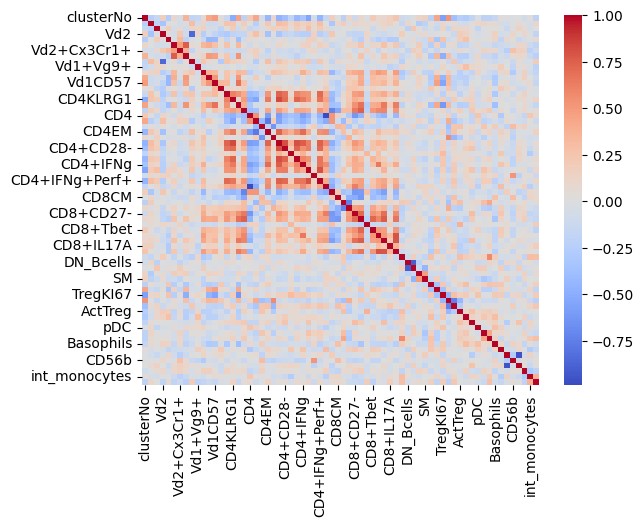

In [ ]:
#lets visualize the correlation matrix using seaborn
sns.heatmap(subset.corr(),cmap='coolwarm')

In [ ]:
# separate the labels/classes from the features/measurement
X=subset.iloc[:,1:]
y=subset.iloc[:,0]

In [ ]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [ ]:
X.shape

(81, 67)

# Split and Train Data Sets
train test ratio 70:30


In [ ]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
random_seed = 56
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

In [ ]:
X_train.shape

(56, 67)

In [ ]:
X_test.shape

(25, 67)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

#Classification

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

# Training Phase
This will be done by parsing the training set to a classifier or classifiers Because we are dealing with 3 classes, this becomes a multiclass classification problem. We therefore us the One-vs-the-rest strategy.
This strategy involves fitting one classifier per class. For each classifier, the class is fitted against all the other classes. Here, we use the Random Forest Classifier

In [ ]:
#Random Forest Classifier
#because we are dealing with multiclass data and so, the one versus rest strategy is used.
#learn to predict each class against the other.
from sklearn.metrics import classification_report, balanced_accuracy_score, roc_auc_score, matthews_corrcoef, f1_score, precision_score, recall_score
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

# set the random seed
random_seed = 56

# create the random forest classifier with random seed
RF = OneVsRestClassifier(RandomForestClassifier(max_features=0.2, random_state=random_seed))

# fit the model
RF.fit(X_train, y_train)

# make predictions
y_pred = RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)


#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)

#matthews 
mcc = matthews_corrcoef(y_test, y_pred)
mcc = round(mcc, 2)
print('mcc:', mcc)


report=classification_report(y_test,y_pred)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.9111
precision:0.9345
recall:0.9200
f1score:0.9211
mcc: 0.88


classification report


              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.83      0.91         6
           2       1.00      0.90      0.95        10

    accuracy                           0.92        25
   macro avg       0.94      0.91      0.92        25
weighted avg       0.93      0.92      0.92        25



In [ ]:
# Get feature importances from the fitted RandomForestClassifier object
importances = RF.estimators_[0].feature_importances_

# Print the feature importances
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance}")

Age: 0.007584240218943835
TCRgd: 0.019605346582957053
Vd2: 0.004920547363271822
Vd2+Vg9+: 0.0036923076923076927
Vd2CD27-: 0.005213763286709207
Vd2+Cx3Cr1+: 0.001708692770713231
Vd2CD57+: 0.0010071675205365043
Vd1: 0.013366541688509648
Vd1+Vg9+: 0.003059791021671826
Vd1CD27-: 0.015182608849140546
Vd1Cx3Cr1: 0.005906439378225005
Vd1CD57: 0.004874749700582399
VD1-VD2-: 0.0015788133435192262
CD4CD57: 0.0
CD4KLRG1: 0.08030615510126962
CD8CD57: 0.007101020408835741
CD8KLRG1: 0.00455229151093853
CD4: 0.007178096094437039
CD4Naive: 0.04598297028461297
CD4CM: 0.0017424118136192435
CD4EM: 0.041079658521625095
CD4Temra: 0.001443053070960048
CD4+CD27-: 0.11395793408688552
CD4+CD28-: 0.03612957466377011
CD4+KI67: 0.0179928932326564
CD4+Tbet: 0.05193186112602875
CD4+IFNg: 0.01166500126579469
CD4+Perf: 0.08273879966401357
CD4+IL17A: 0.001499456112459209
CD4+IFNg+Perf+: 0.05224075396005484
CD8: 0.00784878002122584
CD8Naive: 0.058893554999580114
CD8CM: 0.005391912905294728
CD8EM: 0.017852067099850363
C

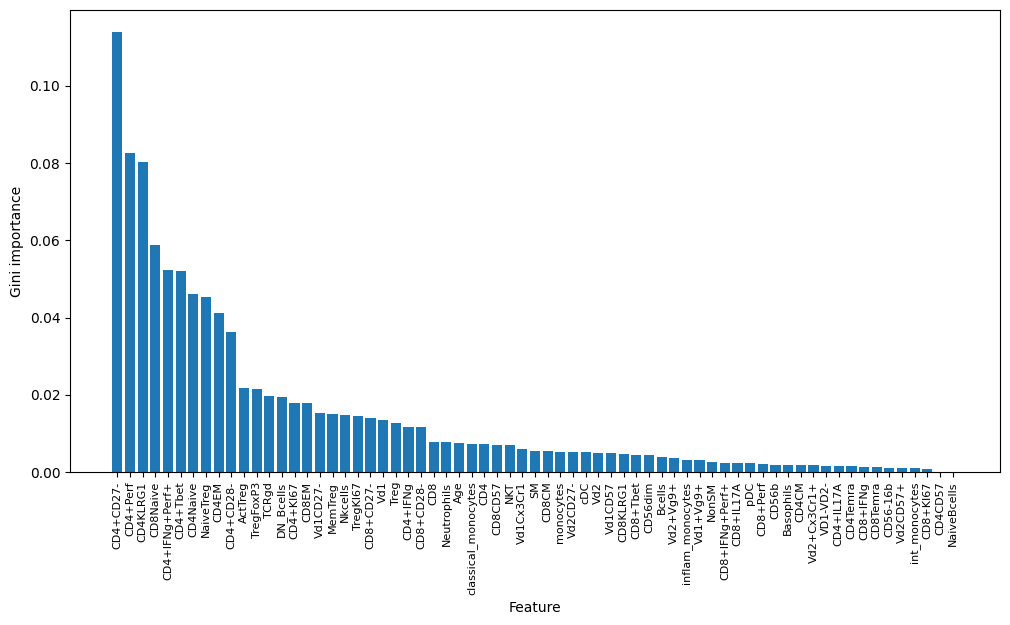

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the fitted RandomForestClassifier object
importances = RF.estimators_[0].feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Set plot size and plot feature importances
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(range(len(sorted_importances)), sorted_importances)
ax.set_xticks(range(len(sorted_importances)))
ax.set_xticklabels(X_train.columns[sorted_indices], rotation=90, fontsize=8)
ax.set_xlabel("Feature")
ax.set_ylabel("Gini importance")
plt.show()

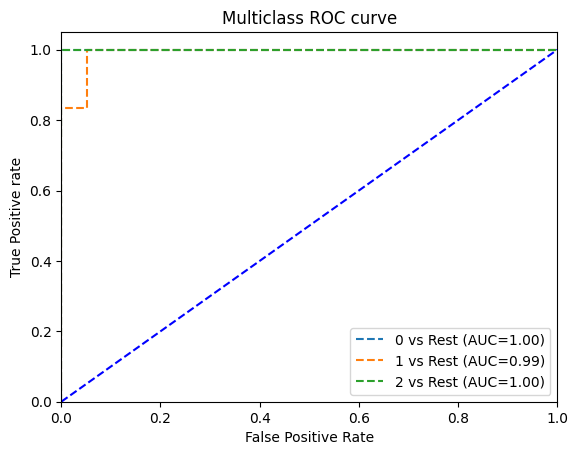

In [ ]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

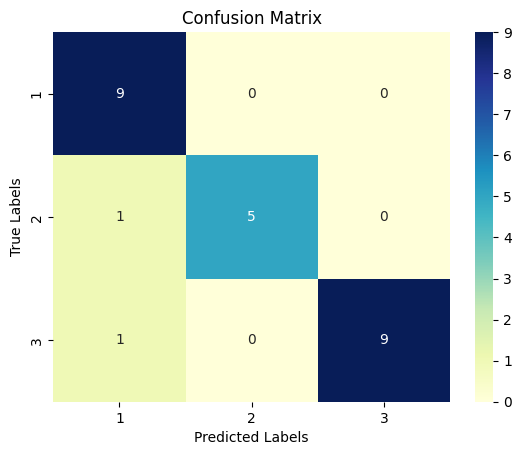

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])

# set plot labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# display plot
plt.show()

In [ ]:
importance_scores = RF.estimators_[0].feature_importances_

<ipython-input-179-d34445d57c27>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clust_imp = clust_imp.append(importance_df, ignore_index=True)


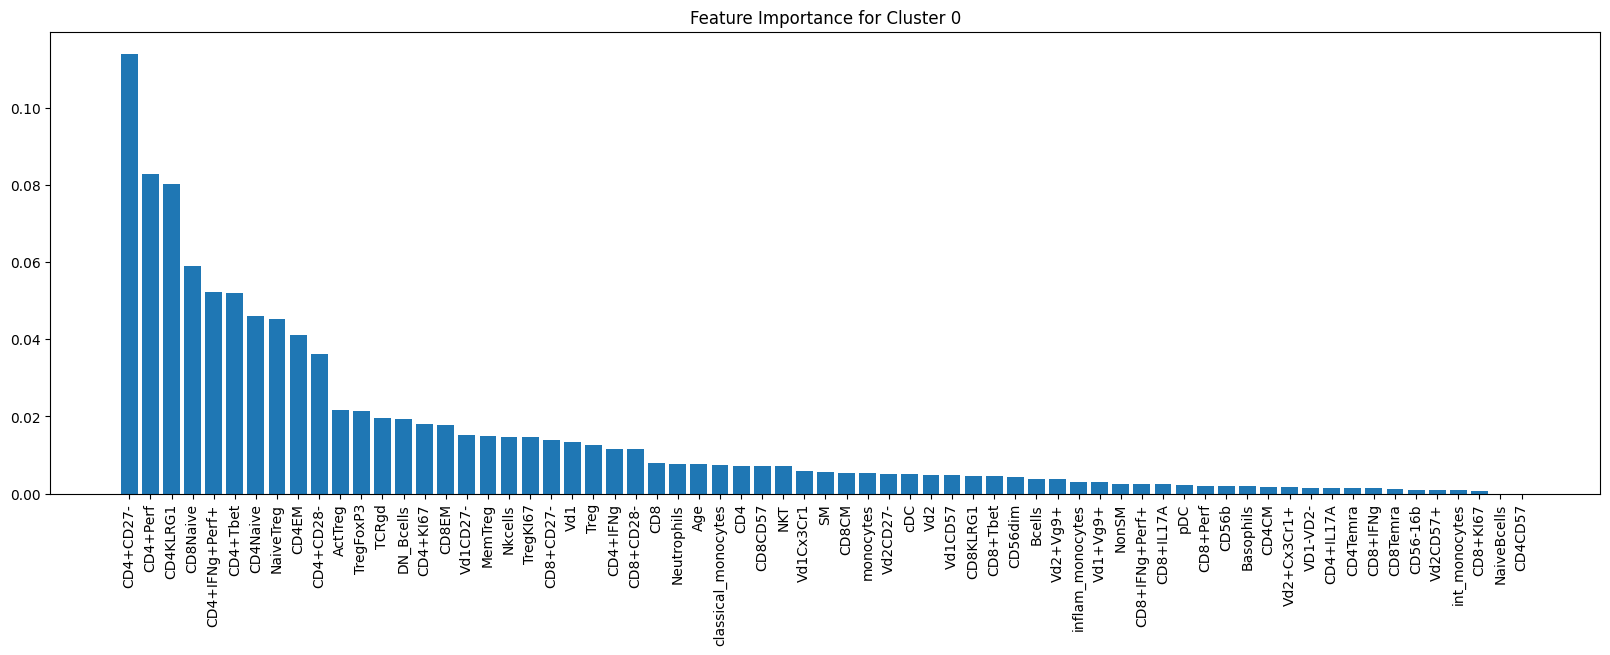

<ipython-input-179-d34445d57c27>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clust_imp = clust_imp.append(importance_df, ignore_index=True)


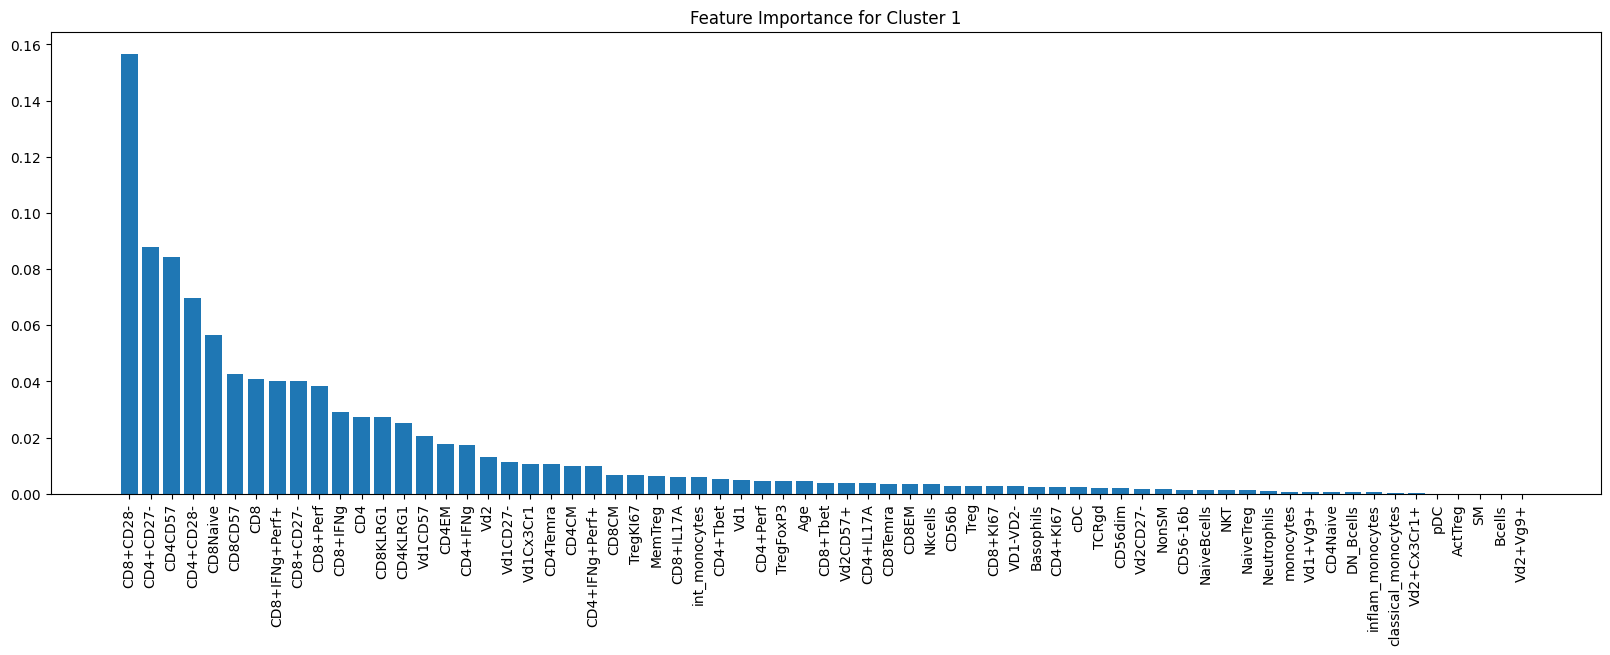

<ipython-input-179-d34445d57c27>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clust_imp = clust_imp.append(importance_df, ignore_index=True)


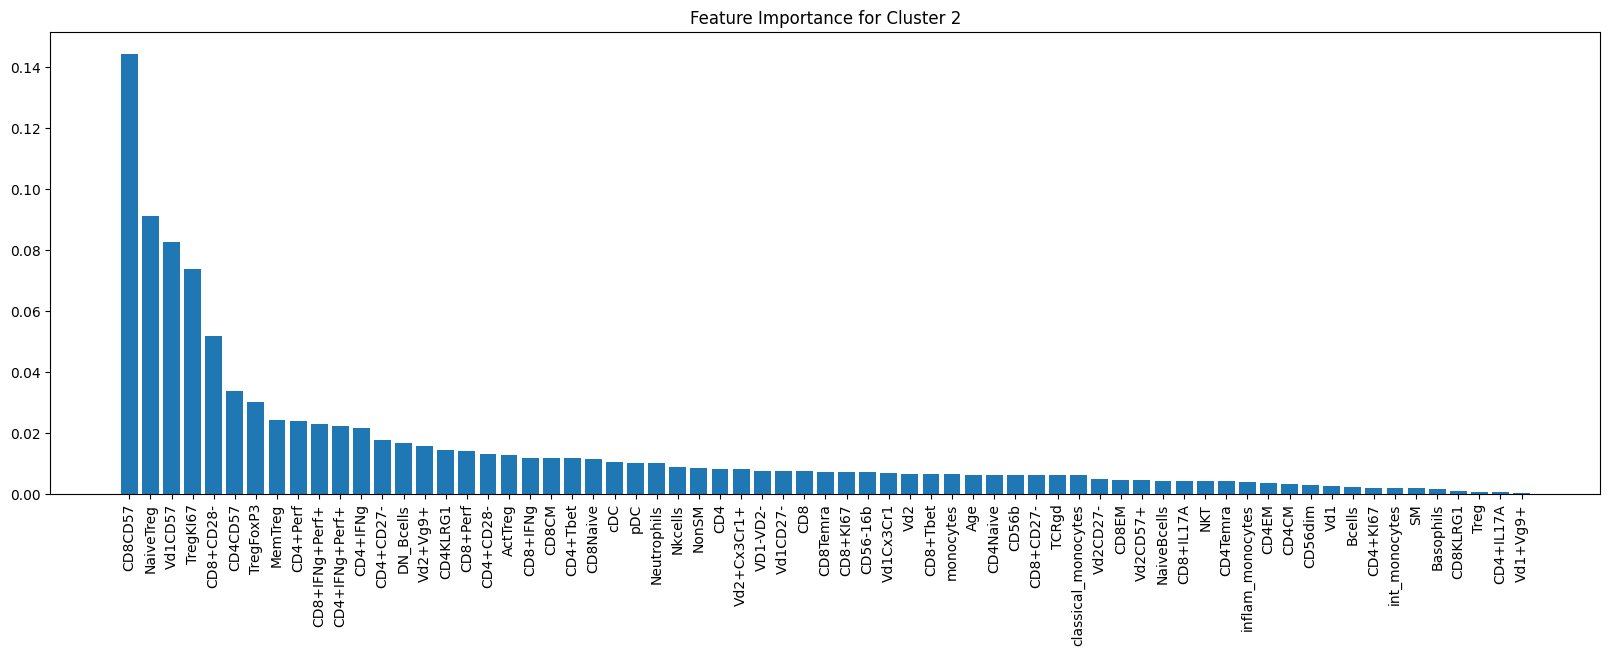

In [ ]:
# get the number of clusters
n_clusters = len(np.unique(y_train))

# get the feature importance for each cluster
features = X_train.columns.tolist()
clust_imp = pd.DataFrame()
for cluster in range(n_clusters):
    importance = RF.estimators_[cluster].feature_importances_
    importance_df = pd.DataFrame({'feature': features, 'importance': importance, 'clusterno':cluster})
    importance_df = importance_df.sort_values('importance', ascending=False)
    clust_imp = clust_imp.append(importance_df, ignore_index=True)
    plt.figure(figsize=(20,6))
    plt.bar(importance_df['feature'], importance_df['importance'])
    plt.xticks(rotation=90)
    plt.title(f'Feature Importance for Cluster {cluster}')
    plt.show()

In [ ]:
No_features = 10

In [ ]:
# for cluster 0
filter =(clust_imp['clusterno']==0)
clust_imp[filter].sort_values(by= ['importance'], ascending = [0]).iloc[:No_features,:]

,feature,importance,clusterno
0,CD4+CD27-,0.113958,0
1,CD4+Perf,0.082739,0
2,CD4KLRG1,0.080306,0
3,CD8Naive,0.058894,0
4,CD4+IFNg+Perf+,0.052241,0
5,CD4+Tbet,0.051932,0
6,CD4Naive,0.045983,0
7,NaiveTreg,0.045265,0
8,CD4EM,0.041080,0
9,CD4+CD28-,0.036130,0


In [ ]:
# for cluster 1
filter =(clust_imp['clusterno']==1)
clust_imp[filter].sort_values(by= ['importance'], ascending = [0]).iloc[:No_features,:]

,feature,importance,clusterno
67,CD8+CD28-,0.156725,1
68,CD4+CD27-,0.087853,1
69,CD4CD57,0.084378,1
70,CD4+CD28-,0.069797,1
71,CD8Naive,0.056440,1
72,CD8CD57,0.042532,1
73,CD8,0.040944,1
74,CD8+IFNg+Perf+,0.040149,1
75,CD8+CD27-,0.040062,1
76,CD8+Perf,0.038443,1


In [ ]:
# for cluster 2
filter =(clust_imp['clusterno']==2)
clust_imp[filter].sort_values(by= ['importance'], ascending = [0]).iloc[:No_features,:]

,feature,importance,clusterno
134,CD8CD57,0.144401,2
135,NaiveTreg,0.090961,2
136,Vd1CD57,0.082597,2
137,TregKI67,0.073589,2
138,CD8+CD28-,0.051612,2
139,CD4CD57,0.033796,2
140,TregFoxP3,0.030022,2
141,MemTreg,0.024244,2
142,CD4+Perf,0.023841,2
143,CD8+IFNg+Perf+,0.022931,2
